<a href="https://colab.research.google.com/github/Ash100/Minor/blob/main/Domain_boundaries_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get install -y hmmer

In [2]:
# Pfam-A is the curated, high-quality domain set
!wget -q ftp://ftp.ebi.ac.uk/pub/databases/Pfam/current_release/Pfam-A.hmm.gz
!gunzip Pfam-A.hmm.gz

In [3]:
# Index the HMM database (required before scanning)
!hmmpress Pfam-A.hmm

Working...    done.
Pressed and indexed 24736 HMMs (24736 names and 24736 accessions).
Models pressed into binary file:   Pfam-A.hmm.h3m
SSI index for binary model file:   Pfam-A.hmm.h3i
Profiles (MSV part) pressed into:  Pfam-A.hmm.h3f
Profiles (remainder) pressed into: Pfam-A.hmm.h3p


In [41]:
from google.colab import files

print("📤 Please upload your motifs.fasta file...")
uploaded = files.upload()

fasta_file = list(uploaded.keys())[0]
print(f"✅ Uploaded: {fasta_file}")

📤 Please upload your motifs.fasta file...


Saving cluster_0.fasta to cluster_0.fasta
✅ Uploaded: cluster_0.fasta


In [42]:
output_tbl = "hmmscan_results.tbl"
output_txt = "hmmscan_results.txt"

!hmmscan --tblout {output_tbl} --domtblout {output_txt} Pfam-A.hmm {fasta_file} > hmmscan_stdout.txt

print("✅ HMMER scan completed!")

✅ HMMER scan completed!


In [43]:
import pandas as pd

columns = [
    "target_name","target_accession","tlen","query_name","query_accession","qlen",
    "E-value","score","bias","domain_num","total_domains",
    "cEvalue","iEvalue","domain_score","domain_bias",
    "hmm_from","hmm_to","ali_from","ali_to","env_from","env_to","acc","description"
]

results = []
with open(output_txt) as f:
    for line in f:
        if line.startswith("#"):  # skip comments
            continue
        parts = line.strip().split(maxsplit=22)  # 23 columns
        if len(parts) >= 23:
            results.append(parts[:23])

df = pd.DataFrame(results, columns=columns)

# Convert numeric columns safely
numeric_cols = ["tlen","qlen","E-value","score","bias","domain_num","total_domains",
                "cEvalue","iEvalue","domain_score","domain_bias",
                "hmm_from","hmm_to","ali_from","ali_to","env_from","env_to","acc"]
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

In [44]:
df.to_csv("cluster_0_hmmscan_parsed_results.csv", index=False)
files.download("cluster_0_hmmscan_parsed_results.csv")

print("✅ Domain annotation results saved as hmmscan_cluster_2.csv")

# Show first few hits
df.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Domain annotation results saved as hmmscan_cluster_2.csv


target_name target_accession  tlen                    query_name  \
0   Herpes_US9       PF06072.16    61    YP_009137145.1|LMWLL@85-89   
1   Herpes_US9       PF06072.16    61    YP_009137222.1|LVWLL@84-88   
2  Herpes_LMP1       PF05297.16   386    YP_001129515.1|LCLLL@83-87   
3      DUF3377       PF11857.13    72  YP_010790405.1|LYALL@256-260   
4        UL74A        PF25727.1    54       YP_495283.1|LMILL@19-23   

  query_accession  qlen       E-value  score  bias  domain_num  ...  \
0               -    16  5.700000e-03   16.9   0.8           1  ...   
1               -    16  8.700000e-02   13.2   0.6           1  ...   
2               -    25  5.300000e-08   32.9   7.3           1  ...   
3               -    25  1.100000e-01   12.9   0.1           1  ...   
4               -    25  3.800000e-08   33.3   4.3           1  ...   

   domain_score  domain_bias  hmm_from  hmm_to  ali_from  ali_to  env_from  \
0          16.9          0.8        45      61         1      15         1   
1          13.2          0.6        45      61         1      15         1   
2          32.9          7.3        73      97         1      25         1   
3          12.9          0.1        38      57         3      22         1   
4          33.2          4.3         9      33         1      25         1   

   env_to   acc                                   description  
0      15  0.96         Alphaherpesvirus tegument protein US9  
1      15  0.95         Alphaherpesvirus tegument protein US9  
2      25  0.98  Herpesvirus latent membrane protein 1 (LMP1)  
3      25  0.88          Domain of unknown function (DUF3377)  
4      25  0.99                 Cytomegalovirus UL74A protein  

[5 rows x 23 columns]

In [1]:
# STEP 1: Install and import dependencies
!pip install matplotlib seaborn pandas plotly

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
#@title Top 10 domains
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from your CSV file with a comma delimiter
try:
    df = pd.read_csv('/content/cluster_0_hmmscan_parsed_results.csv', sep=',')
except FileNotFoundError:
    print("Error: The file 'your_data.csv' was not found. Please make sure you have uploaded the correct file and name.")
except Exception as e:
    print(f"An error occurred: {e}")

# Proceed only if the DataFrame was loaded successfully
if 'df' in locals():
    # Clean up column names by removing any leading or trailing whitespace
    df.columns = df.columns.str.strip()

    # Now, check if the 'target_name' column exists in the cleaned column list
    if 'target_name' in df.columns:
        # Count the frequency of each domain and get the top 10
        top_10_domains = df['target_name'].value_counts().nlargest(10).sort_values(ascending=True)

        # Set a fixed figure size for better visualization of 10 bars
        plt.figure(figsize=(10, 8))

        # Plot the top 10 domains
        top_10_domains.plot(kind='barh')

        plt.title('Top 10 Most Frequent Protein Domains')
        plt.xlabel('Frequency')
        plt.ylabel('Protein Domain')
        plt.tight_layout()

        # Save the figure with a specified DPI. A value of 300 is recommended for publications.
        plt.savefig('cl_0_top_10_domains.png', dpi=600)
        plt.show()

    else:
        print("Error: The 'target_name' column was not found in the CSV file, even after cleaning. Please check the spelling of the column name.")

In [70]:
#@title all in one
#@title Multi-panel Top 10 Domains from 5 CSVs
import pandas as pd
import matplotlib.pyplot as plt

# ======================
# CONFIGURATION
# ======================
csv_files = [
    "/content/cluster_1_hmmscan_parsed_results.csv",
    "/content/cluster_2_hmmscan_parsed_results.csv",
    "/content/cluster_3_hmmscan_parsed_results.csv",
    "/content/cluster_4_hmmscan_parsed_results.csv",
    "/content/cluster_0_hmmscan_parsed_results.csv"
]

titles = [
    "Cluster 1: Top 10 Domains",
    "Cluster 2: Top 10 Domains",
    "Cluster 3: Top 10 Domains",
    "Cluster 4: Top 10 Domains",
    "Cluster 0: Top 10 Domains"
]

# ======================
# PLOT MULTI-FIGURE
# ======================
plt.figure(figsize=(12, 14), dpi=600)

for i, (csv, title) in enumerate(zip(csv_files, titles), 1):
    try:
        df = pd.read_csv(csv, sep=",")
        df.columns = df.columns.str.strip()

        if "target_name" not in df.columns:
            print(f"⚠️ Skipping {csv}, missing 'target_name' column")
            continue

        # Get Top 10 Domains
        top_10 = df["target_name"].value_counts().nlargest(10).sort_values(ascending=True)

        # Subplot
        ax = plt.subplot(5, 1, i)   # 5 rows, 1 column
        top_10.plot(kind="barh", ax=ax, color="steelblue", edgecolor="black")

        ax.set_title(title, fontsize=14, weight="bold")
        ax.set_xlabel("Frequency", fontsize=12)
        ax.set_ylabel("Protein Domain", fontsize=12)
        ax.grid(axis="x", linestyle="--", alpha=0.5)

    except Exception as e:
        print(f"Error with {csv}: {e}")

plt.tight_layout()
plt.savefig("all_clusters_top10_domains.png", dpi=600, bbox_inches="tight")
plt.show()


In [ ]:
#@title all domains import pandas as pd
import matplotlib.pyplot as plt

# Load the data from your CSV file with a comma delimiter
try:
    df = pd.read_csv('/content/cluster_2_hmmscan_parsed_results.csv', sep=',')
except FileNotFoundError:
    print("Error: The file 'your_data.csv' was not found. Please make sure you have uploaded the correct file and name.")
except Exception as e:
    print(f"An error occurred: {e}")

# Proceed only if the DataFrame was loaded successfully
if 'df' in locals():
    # Clean up column names by removing any leading or trailing whitespace
    df.columns = df.columns.str.strip()

    # Now, check if the 'target_name' column exists in the cleaned column list
    if 'target_name' in df.columns:
        # Count the frequency of each domain and sort it
        domain_counts = df['target_name'].value_counts().sort_values(ascending=False)

        # Set a larger figure size for better readability with more domains
        plt.figure(figsize=(12, len(domain_counts) * 0.3))

        # Plot all domains
        domain_counts.plot(kind='barh')

        plt.title('Frequency of All Protein Domains')
        plt.xlabel('Frequency')
        plt.ylabel('Protein Domain')
        plt.tight_layout()

        # Save the figure with a specified DPI. A value of 300 is recommended for publications.
        plt.savefig('cluster_2_300dpi.png', dpi=300)
        plt.show()

    else:
        print("Error: The 'target_name' column was not found in the CSV file, even after cleaning. Please check the spelling of the column name.")

In [53]:
# Install dependencies
!pip install logomaker biopython

In [ ]:
import logomaker
import pandas as pd
from Bio import SeqIO
import matplotlib.pyplot as plt

# --- Step 1: Load motifs from FASTA ---
fasta_file = "/content/cl1_aligned.fas"  # <-- upload your motifs.fasta

sequences = [str(record.seq).upper() for record in SeqIO.parse(fasta_file, "fasta")]
print(f"✅ Loaded {len(sequences)} motifs")
print("First 3 motifs:", sequences[:3])

# --- Step 2: Ensure equal length (~25 aa) ---
motif_length = max(len(s) for s in sequences)
print(f"Motif length: {motif_length} aa")

# Pad sequences if needed
seqs_padded = [s.ljust(motif_length, '-') for s in sequences]

# --- Step 3: Build counts matrix ---
aa_alphabet = list("ACDEFGHIKLMNPQRSTVWY-")
counts_mat = pd.DataFrame(0, index=range(motif_length), columns=aa_alphabet)

for seq in seqs_padded:
    for i, aa in enumerate(seq):
        if aa in counts_mat.columns:
            counts_mat.loc[i, aa] += 1

# --- Step 4: Convert to probability matrix ---
prob_mat = counts_mat.div(counts_mat.sum(axis=1), axis=0)

# --- Step 5: Define colors by amino acid properties ---
aa_color = {
    # Hydrophobic (green)
    'A': 'forestgreen', 'V': 'forestgreen', 'L': 'forestgreen',
    'I': 'forestgreen', 'M': 'forestgreen', 'F': 'forestgreen',
    'W': 'forestgreen', 'Y': 'forestgreen',

    # Polar uncharged (purple)
    'S': 'purple', 'T': 'purple', 'N': 'purple', 'Q': 'purple', 'C': 'purple',

    # Positive (blue)
    'K': 'blue', 'R': 'blue', 'H': 'blue',

    # Negative (red)
    'D': 'red', 'E': 'red',

    # Special cases (orange)
    'G': 'orange', 'P': 'orange',

    # Gap (lightgray)
    '-': 'lightgray'
}

# --- Step 6: Plot sequence logo ---
plt.figure(figsize=(12, 4), dpi=300)
logo = logomaker.Logo(prob_mat,
                      color_scheme=aa_color,
                      shade_below=.5,
                      fade_below=.5,
                      font_name='Arial Rounded MT Bold')

logo.style_spines(visible=False)
logo.style_spines(spines=['left', 'bottom'], visible=True)
logo.style_xticks(rotation=0, fmt='%d', anchor=0)
plt.xlabel("Motif Position")
plt.ylabel("Relative Frequency")
plt.title("Sequence Logo of Motifs (~25 aa)")
plt.tight_layout()
plt.savefig("cl_1_motif_logo_colored.png", dpi=600)  # high-res for publication
plt.show()


In [ ]:
#@tile All in one logo
import logomaker
import pandas as pd
from Bio import SeqIO
import matplotlib.pyplot as plt

# ======================
# CONFIGURATION
# ======================
fasta_files = [
    "/content/cl1_aligned.fas",
    "/content/cl2_aligned.fas",
    "/content/cl3_aligned.fas",
    "/content/cl4_aligned.fas",
    "/content/cl0_aligned.fas"
]

titles = [
    "Cluster 1 Motif",
    "Cluster 2 Motif",
    "Cluster 3 Motif",
    "Cluster 4 Motif",
    "Cluster 0 Motif"
]

# Amino acid color scheme (hydrophobic, polar, charged, special)
aa_color = {
    'A': 'forestgreen','V': 'forestgreen','L': 'forestgreen','I': 'forestgreen',
    'M': 'forestgreen','F': 'forestgreen','W': 'forestgreen','Y': 'forestgreen',
    'S': 'purple','T': 'purple','N': 'purple','Q': 'purple','C': 'purple',
    'K': 'royalblue','R': 'royalblue','H': 'royalblue',
    'D': 'crimson','E': 'crimson',
    'G': 'darkorange','P': 'darkorange',
    '-': 'lightgray'
}

# ======================
# FUNCTION: Build probability matrix
# ======================
def build_prob_matrix(fasta_file):
    sequences = [str(record.seq).upper() for record in SeqIO.parse(fasta_file, "fasta")]
    motif_length = max(len(s) for s in sequences)
    seqs_padded = [s.ljust(motif_length, '-') for s in sequences]

    aa_alphabet = list("ACDEFGHIKLMNPQRSTVWY-")
    counts_mat = pd.DataFrame(0, index=range(motif_length), columns=aa_alphabet)

    for seq in seqs_padded:
        for i, aa in enumerate(seq):
            if aa in counts_mat.columns:
                counts_mat.loc[i, aa] += 1

    prob_mat = counts_mat.div(counts_mat.sum(axis=1), axis=0)
    return prob_mat

# ======================
# PLOT MULTI-LOGO FIGURE
# ======================
plt.figure(figsize=(16, 10), dpi=300)
plt.style.use("classic")

n_files = len(fasta_files)

for i, (fasta, title) in enumerate(zip(fasta_files, titles), 1):
    prob_mat = build_prob_matrix(fasta)

    ax = plt.subplot(n_files, 1, i)  # 5 rows, 1 column
    logo = logomaker.Logo(prob_mat,
                          ax=ax,
                          color_scheme=aa_color,
                          shade_below=.5,
                          fade_below=.5,
                          font_name='Arial Rounded MT Bold')

    # Aesthetics
    logo.style_spines(visible=False)
    logo.style_spines(spines=['left', 'bottom'], visible=True)
    logo.style_xticks(rotation=0, fmt='%d', anchor=0, spacing=2)
    ax.set_xlabel("Position", fontsize=12)
    ax.set_ylabel("Rel. Freq", fontsize=12)
    ax.set_title(title, fontsize=14, weight='bold')
    ax.grid(False)

plt.tight_layout()
plt.savefig("all_clusters_sequence_logos.png", dpi=600, bbox_inches="tight")
plt.show()


In [8]:
file_path = "/content/123.csv"  # <-- change to your file
df = pd.read_csv(file_path, sep=",")

# Clean column names
df.columns = df.columns.str.strip()

In [9]:
plt.figure(figsize=(8, 14), dpi=300)

# Pivot data: Motif_ID on Y-axis, value is Nearest_Neighbors
heatmap_data = df.set_index("Motif_ID")[["Nearest_Neighbors"]]

sns.heatmap(
    heatmap_data,
    cmap="viridis",
    cbar_kws={"label": "Nearest Neighbors"},
    linewidths=0.2,
    linecolor="gray"
)

plt.title("Nearest Neighbors per Motif", fontsize=16, weight="bold")
plt.ylabel("Motif ID", fontsize=14)
plt.xlabel("")
plt.tight_layout()
plt.savefig("motif_nearest_neighbors_heatmap.png", dpi=600)
plt.show()

ValueError: could not convert string to float: 'NP_056919.1|LESLL@336-340, YP_325663.1|LKKLL@1972-1976, NP_663784.1|LKELL@816-820, YP_073826.1|LSELL@394-398'

<Figure size 2400x4200 with 0 Axes>

/tmp/ipython-input-2245624465.py:75: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  rgb_matrix = color_matrix.applymap(lambda c: mcolors.to_rgba(c))


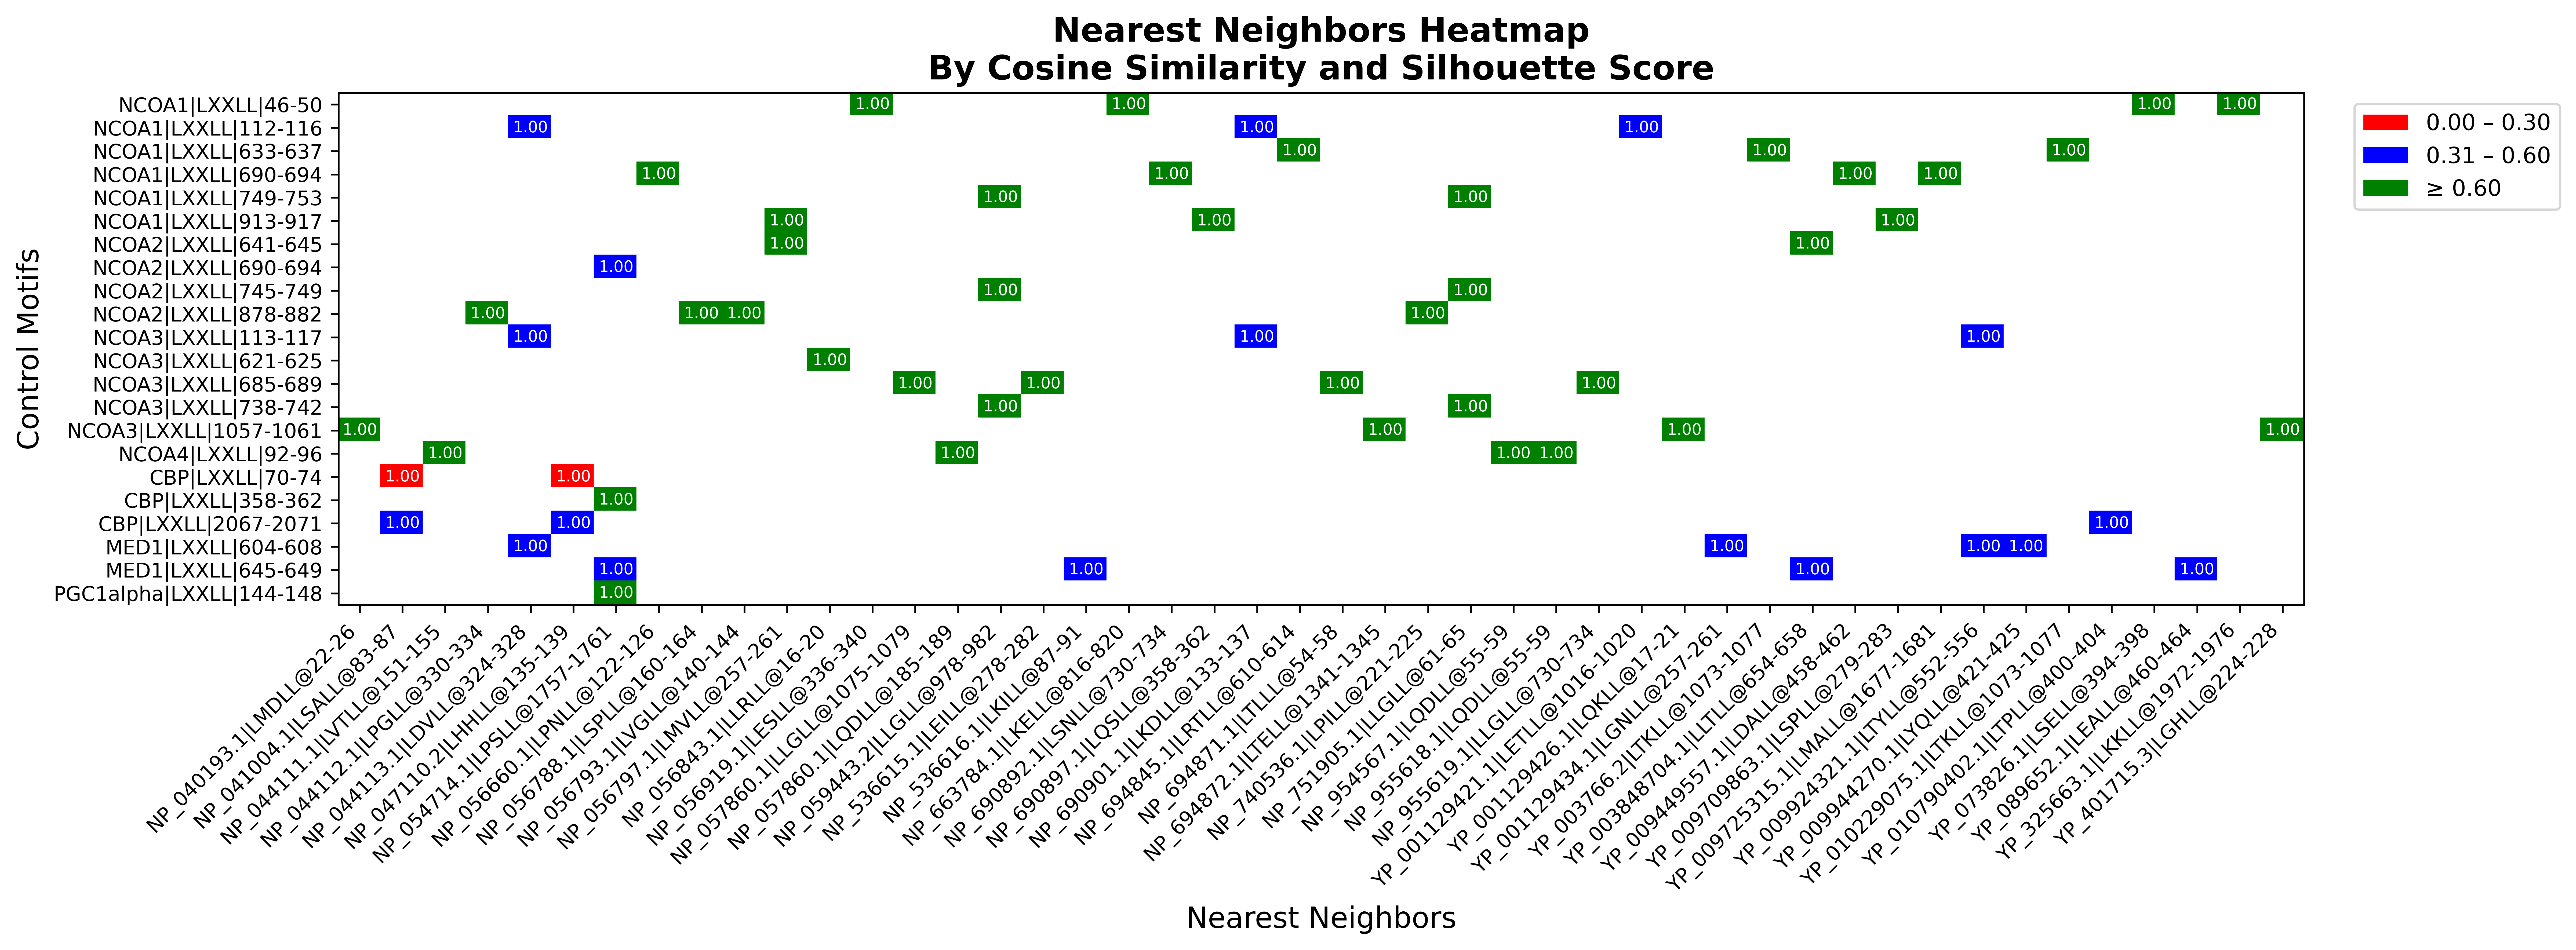

In [19]:
#@title Heatmap of Nearest Neighbors with BOTH Cosine Similarity (values) + Silhouette Score (colors)
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Patch

# ========= CONFIG =========
csv_path = "/content/123.csv"   # <-- update your file
neighbor_col = "Nearest_Neighbors"
motif_col = "Motif_ID"
similarity_col = "Cosine_Similarity"
silhouette_col = "Silhouette_Score"

# ========= LOAD =========
df = pd.read_csv(csv_path)
df.columns = df.columns.str.strip()

# check required columns
needed = {motif_col, neighbor_col, similarity_col, silhouette_col}
missing = [c for c in needed if c not in df.columns]
if missing:
    raise ValueError(f"Missing required columns: {missing}")

# ========= PARSE NEAREST NEIGHBORS =========
def parse_neighbors(s: str):
    if pd.isna(s) or not str(s).strip():
        return []
    items = [x.strip() for x in str(s).split(",") if x.strip()]
    cleaned = [re.split(r'[:(]', x)[0].strip() for x in items]
    return [c for c in cleaned if c]

long_neighbors = (
    df[[motif_col, neighbor_col, similarity_col, silhouette_col]]
    .assign(neigh_list=lambda d: d[neighbor_col].map(parse_neighbors))
    .explode("neigh_list")
    .dropna(subset=["neigh_list"])
    .rename(columns={"neigh_list":"Neighbor"})
)

if long_neighbors.empty:
    raise ValueError("No neighbors parsed from Nearest_Neighbors.")

# ========= COLOR MAPPING BASED ON SILHOUETTE SCORE =========
def color_from_silhouette(val):
    if val < 0:
        return "black"
    elif 0 <= val <= 0.20:
        return "red"
    elif 0.21 <= val <= 0.40:
        return "blue"
    else:
        return "green"

long_neighbors["Color"] = long_neighbors[silhouette_col].apply(color_from_silhouette)

# ========= BUILD MATRICES =========
motif_order = df[motif_col].unique()
neighbor_order = sorted(long_neighbors["Neighbor"].unique())

color_matrix = pd.DataFrame("white", index=motif_order, columns=neighbor_order)
value_matrix = pd.DataFrame("", index=motif_order, columns=neighbor_order)

for _, row in long_neighbors.iterrows():
    color_matrix.at[row[motif_col], row["Neighbor"]] = row["Color"]
    value_matrix.at[row[motif_col], row["Neighbor"]] = f"{row[similarity_col]:.2f}"

# ========= PLOT =========
n_rows, n_cols = color_matrix.shape
fig_w = max(8, min(28, 0.35 * max(10, n_cols)))
fig_h = max(6, min(40, 0.25 * max(20, n_rows)))

fig, ax = plt.subplots(figsize=(fig_w, fig_h), dpi=600)
rgb_matrix = color_matrix.applymap(lambda c: mcolors.to_rgba(c))

# draw cells
for i, motif in enumerate(color_matrix.index):
    for j, neigh in enumerate(color_matrix.columns):
        rect_color = rgb_matrix.at[motif, neigh]
        ax.add_patch(plt.Rectangle((j, i), 1, 1, color=rect_color))
        text_val = value_matrix.at[motif, neigh]
        if text_val:
            ax.text(j+0.5, i+0.5, text_val,
                    ha="center", va="center",
                    fontsize=7,
                    color="white" if rect_color[:3] != (1,1,1) else "black")

ax.set_xlim(0, n_cols)
ax.set_ylim(0, n_rows)
ax.set_xticks(np.arange(n_cols)+0.5)
ax.set_yticks(np.arange(n_rows)+0.5)
ax.set_xticklabels(color_matrix.columns, rotation=45, ha="right", fontsize=9)
ax.set_yticklabels(color_matrix.index, fontsize=9)
ax.invert_yaxis()

ax.set_title("Nearest Neighbors Heatmap\nBy Cosine Similarity and Silhouette Score", fontsize=15, weight="bold")
ax.set_xlabel("Nearest Neighbors", fontsize=13)
ax.set_ylabel("Control Motifs", fontsize=13)

# Legend (Silhouette Score → Color)
legend_elements = [
    Patch(facecolor="red", label="0.00 – 0.30"),
    Patch(facecolor="blue", label="0.31 – 0.60"),
    Patch(facecolor="green", label="≥ 0.60")
]
ax.legend(handles=legend_elements, bbox_to_anchor=(1.02, 1), loc="upper left")

plt.tight_layout()
plt.savefig("heatmap_cosine_values_silhouette_colors.png", dpi=600, bbox_inches="tight")
plt.show()


In [20]:
# === Step 1: Load CSV ===
import pandas as pd

# Update with your file path
csv_path = "/content/ncbi_refseq_with_lxxll_motif.csv"
df = pd.read_csv(csv_path)

# Inspect columns
print("Available columns:", df.columns.tolist())
df.head()


Available columns: ['ID', 'Sequence', 'Virus Name', 'Protein Name', 'Motif Position', 'Motif Sequence', 'Positive']


ID                                           Sequence  \
0  YP_009137149.1  MASENKQRPGSPGPTDGPPPTPSPDRDERGALGWGAETEEGGDDPD...   
1  YP_009137149.1  MASENKQRPGSPGPTDGPPPTPSPDRDERGALGWGAETEEGGDDPD...   
2  YP_009137145.1  MTSRLSDPNSSARSDMSVPLYPTASPVSVEAYYSESEDEAANDFLV...   
3  YP_009137140.1  MSLRAVWHLGLLGSLVGAVLAATHRGPAANTTDPLTHAPVSPHPSP...   
4  YP_009137226.1  MSAEQRKKKKTTTTTQGRGAEVAMADEDGGRLRAAAETTGGPGSPD...   

               Virus Name                    Protein Name  Motif Position  \
0  Herpes Simplex Virus 1  transcriptional regulator icp4             697   
1  Herpes Simplex Virus 1  transcriptional regulator icp4             961   
2  Herpes Simplex Virus 1            membrane protein us9              85   
3  Herpes Simplex Virus 1         envelope glycoprotein j              69   
4  Herpes Simplex Virus 2  transcriptional regulator icp4             766   

  Motif Sequence  Positive  
0          LRPLL       NaN  
1          LSCLL       NaN  
2          LMWLL       NaN  
3          LLELL       NaN  
4          LRPLL       NaN

In [ ]:
import pandas as pd
import re

# === Step 1: Load both CSVs ===
df1 = pd.read_csv("/content/123.csv")       # contains Nearest_Neighbors
df2 = pd.read_csv("/content/ncbi_refseq_with_lxxll_motif.csv")    # contains ID and Motif Sequence

# Add Positive column if not already there
if "Positive" not in df2.columns:
    df2["Positive"] = ""

# Normalize text columns
df2["ID"] = df2["ID"].astype(str).str.strip()
df2["Motif Position"] = df2["Motif Position"].astype(str).str.strip()

# === Step 2: Extract accession + motif start from df1 ===
matches = []
for neighbors in df1["Nearest_Neighbors"].dropna():
    for cand in neighbors.split(","):
        cand = cand.strip()
        # Example: NP_056919.1|LESLL@336-340
        match = re.match(r"([^|]+)\|[^@]+@(\d+)", cand)
        if match:
            accession = match.group(1).strip()
            start_pos = match.group(2).strip()  # keep as string
            matches.append((accession, start_pos))

# === Step 3: Mark positives in df2 if both ID and Motif Sequence match ===
for acc, start in matches:
    condition = (df2["ID"] == acc) & (df2["Motif Position"] == start)
    df2.loc[condition, "Positive"] = "Positive"

# === Step 4: Save output ===
output_path = "/content/second_with_positives.csv"
df2.to_csv(output_path, index=False)

print(f"✅ Updated file saved as {output_path}")
display(df2.head(20))


In [26]:
import pandas as pd

# Load the updated file with Positive column
df2 = pd.read_csv("/content/second_with_positives.csv")

# Filter positives
positives = df2[df2["Positive"] == "Positive"]

# Open txt file for writing
output_path = "/content/positive_virus_protein.txt"
with open(output_path, "w") as f:
    for _, row in positives.iterrows():
        f.write(f"Virus: {row['Virus Name']} | Protein: {row['Protein Name']}\n")

print(f"✅ Extracted info saved to {output_path}")


✅ Extracted info saved to /content/positive_virus_protein.txt
